In [1]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
original_img_dir = 'dataset/original_dataset/images/render'

In [4]:

images = [os.path.join(original_img_dir, x) for x in sorted(os.listdir(original_img_dir))]


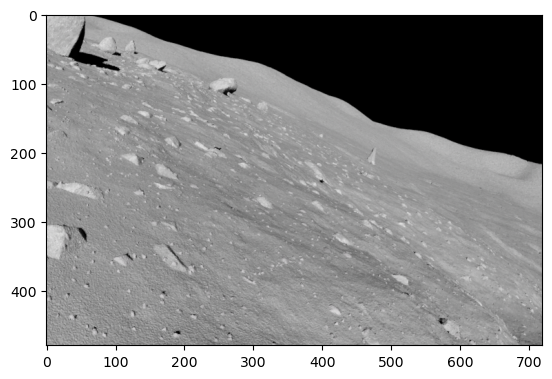

In [20]:
img_path = images[38]


img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image
plt.imshow(img)
plt.show()


In [21]:
def relative_to_absolute(bbox, img_shape):
    img_h, img_w = img_shape[:2]
    x, y, w, h = bbox
    abs_x = int((x-w/2) * img_w)
    abs_y = int((y - h/2) * img_h)
    abs_w = int(w * img_w)
    abs_h = int(h * img_h)
    return abs_x, abs_y, abs_w, abs_h

def draw_bounding_boxes(image, bboxes):
    for bbox in bboxes:
        x, y, w, h = bbox
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image


In [22]:
csv_file = "bbox_data.csv"  # Replace with your CSV file path
data = pd.read_csv(csv_file, header=0)

grouped_df = data.groupby(data.columns[0]) 
print(grouped_df.get_group('render0002.png'))

            image  center_x  center_y     width    height
1  render0002.png  0.684028  0.943750  0.154167  0.112500
2  render0002.png  0.125000  0.759375  0.080556  0.093750
3  render0002.png  0.085417  0.510417  0.034722  0.050000
4  render0002.png  0.188889  0.398958  0.052778  0.064583
5  render0002.png  0.917361  0.453125  0.165278  0.268750
6  render0002.png  0.697917  0.355208  0.062500  0.085417
7  render0002.png  0.506250  0.291667  0.029167  0.037500
8  render0002.png  0.993056  0.009375  0.013889  0.018750
9  render0002.png  0.577778  0.017708  0.127778  0.035417


[(0, 459, 33, 21), (710, 448, 9, 30), (168, 442, 68, 37), (323, 435, 56, 45), (569, 421, 131, 57), (695, 406, 24, 33), (620, 392, 40, 28), (135, 357, 30, 22), (0, 350, 42, 36), (195, 349, 133, 90), (85, 341, 15, 15), (367, 338, 155, 75), (661, 327, 29, 28), (0, 322, 12, 24), (154, 315, 22, 24), (208, 313, 48, 21), (33, 308, 58, 36), (543, 302, 41, 30), (417, 297, 45, 24), (158, 297, 18, 16), (586, 294, 55, 36), (701, 293, 18, 45), (0, 274, 24, 24), (108, 272, 40, 22), (699, 271, 15, 15), (197, 265, 64, 30), (482, 263, 22, 18), (527, 258, 19, 18), (373, 255, 54, 24), (57, 244, 34, 21), (468, 231, 18, 18), (204, 220, 15, 15), (356, 208, 25, 21), (298, 203, 39, 30), (42, 196, 45, 51), (352, 169, 66, 30), (278, 157, 32, 21), (635, 147, 25, 25), (208, 133, 30, 27), (430, 84, 193, 108)]


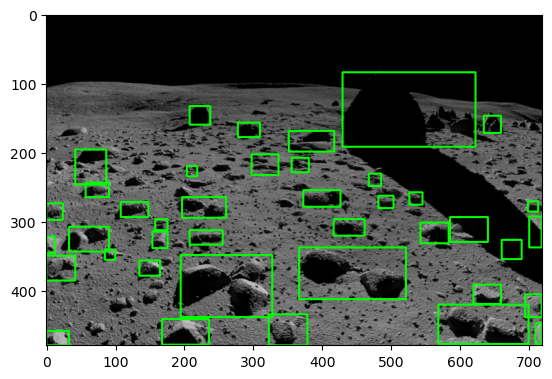

In [28]:
bboxes = []
img_path = 'dataset/original_dataset/images/render/render0085.png'
img =  cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for bbox in grouped_df.get_group('render0085.png').values:
    # print(bbox[1:])    
    bboxes.append(relative_to_absolute(bbox[1:], img.shape))

print([bbox for bbox in bboxes])
absolute_bboxes = [bbox_coords for bbox_coords in bboxes]
image_with_bboxes = draw_bounding_boxes(img, absolute_bboxes)
plt.imshow(image_with_bboxes)
plt.show()

# print(bbox_coords for bbox_coords in bboxes)
# absolute_bboxes = [print(bbox_coords, img.shape) for bbox_coords in [bboxes]]
# image_with_bboxes = draw_bounding_boxes(img.copy(), absolute_bboxes)
# plt.imshow(image_with_bboxes)
# plt.show()

(194606,) (480, 720)


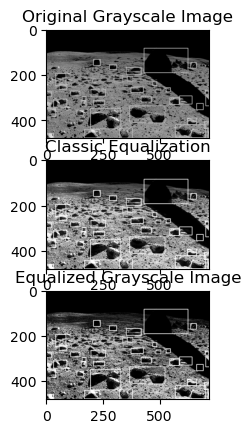

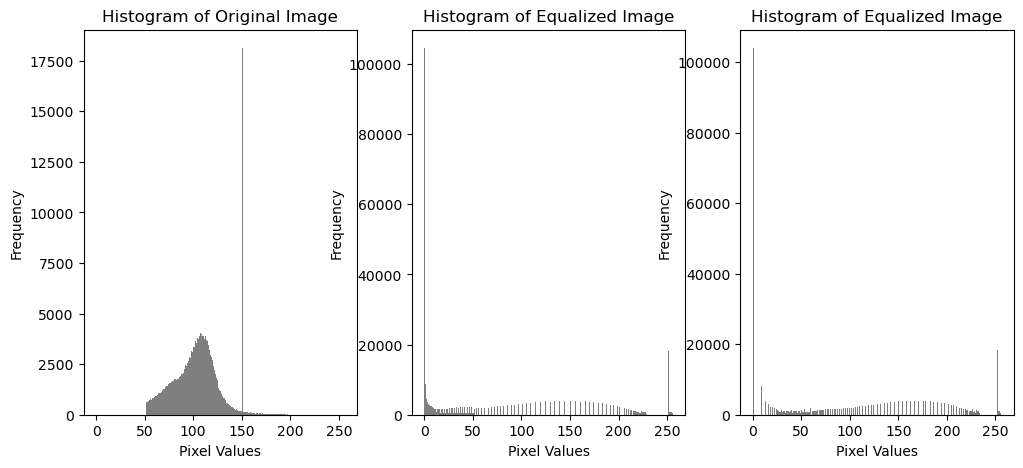

In [29]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

reg_eq_img = cv2.equalizeHist(gray_img)
# print(gray_img)

# Step 3: Apply histogram equalization
# Create a mask for pixels above the threshold
mask = gray_img > 50

equalized_img = np.copy(gray_img)
equalized_pixels = cv2.equalizeHist(gray_img[mask].reshape(-1))
print(equalized_img[mask].shape, equalized_img.shape)
equalized_img[mask] = equalized_pixels.reshape(-1)

plt.subplot(3, 1, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_img, cmap='gray')

plt.subplot(3, 1, 2)
plt.title('Classic Equalization')
plt.imshow(reg_eq_img, cmap='gray')

plt.subplot(3, 1, 3)
plt.title('Equalized Grayscale Image')
plt.imshow(equalized_img, cmap='gray')

plt.show()

# Plot the histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title('Histogram of Original Image')
plt.hist(gray_img[mask].ravel(), bins=256, range=(0, 256), color='black', alpha=0.5)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.title('Histogram of Equalized Image')
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='black', alpha=0.5)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.title('Histogram of Equalized Image')
plt.hist(reg_eq_img.ravel(), bins=256, range=(0, 256), color='black', alpha=0.5)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.show()

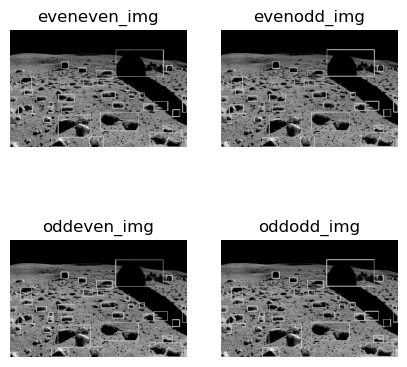

In [31]:
# first refers to column wise, second refers to row wise
eveneven_img = gray_img[:, ::2][::2, :]
evenodd_img = gray_img[:, ::2][1::2, :]


oddeven_img = gray_img[:, 1::2][::2, :]
oddodd_img = gray_img[:, 1::2][1::2, :]

plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
plt.title('eveneven_img')
plt.imshow(eveneven_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('evenodd_img')
plt.imshow(evenodd_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('oddeven_img')
plt.imshow(oddeven_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('oddodd_img')
plt.imshow(oddodd_img, cmap='gray')
plt.axis('off')

plt.show()